Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Eisha"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.


1. [1,5,6,2,3,4,7,8,9]
2. 7

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [3]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    #sets z as r, the last element
    z = A[r]
    #sets i as the second element in the list
    i = p-1
    #for the entirety of A
    for j in range(p, r):
        #i is incremented if j is less than pivot
        if A[j] <= z:
            i += 1
            #i and j swithc places
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

In [4]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [5]:
def quick_sort(A,p,r):

    # YOUR CODE HERE
    if p < r:
        q = partition(A, p, r)
        quick_sort(A, p, q-1)
        quick_sort(A, q+1, r)
    return A
    #raise NotImplementedError()

In [6]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


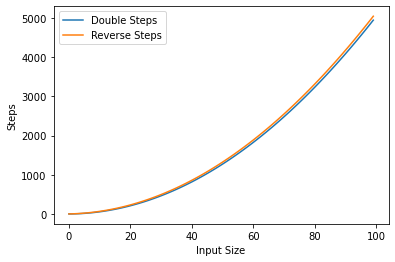

In [17]:
def separation(A,p,r, count):
    """
    Assume r<len(A) and p>=0
    """
    z = A[r]
    i = p-1
    for j in range(p, r):
        count += 1
        if A[j] <= z:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1, count

def quicksort(A,p,r, steps = 0):
    if p < r:
        q, steps = separation(A, p, r, steps)
        A, steps = quicksort(A, p, q-1, steps+1)
        A, steps = quicksort(A, q+1, r, steps)
    return A, steps

doublesteps = []
for i in range(100):
    array = [j for j in range(i)]
    steps = quicksort(array, 0, len(array)-1)[1]
    doublesteps.append(steps)

reversesteps = []
for i in range(100):
    array = [j for j in range(i, -1, -1)]
    steps = quicksort(array, 0, len(array)-1)[1]
    reversesteps.append(steps)

import matplotlib.pyplot as plt
plt.plot(range(100), doublesteps, label = "Double Steps")
plt.plot(range(100), reversesteps, label = "Reverse Steps")
plt.xlabel("Input Size")
plt.ylabel("Steps")
plt.legend()
plt.show()